In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc, classification_report
from sklearn import metrics as mt
from numpy import sqrt 
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import metrics as mt
from matplotlib.pyplot import figure
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from keras import backend as K

In [4]:
df = pd.read_csv('final_project(5).csv')
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [5]:
df.isna().mean()

x0     0.000162
x1     0.000156
x2     0.000237
x3     0.000231
x4     0.000162
x5     0.000231
x6     0.000162
x7     0.000169
x8     0.000131
x9     0.000188
x10    0.000269
x11    0.000188
x12    0.000225
x13    0.000194
x14    0.000212
x15    0.000219
x16    0.000162
x17    0.000169
x18    0.000250
x19    0.000219
x20    0.000237
x21    0.000181
x22    0.000169
x23    0.000294
x24    0.000175
x25    0.000138
x26    0.000225
x27    0.000188
x28    0.000219
x29    0.000188
x30    0.000188
x31    0.000244
x32    0.000194
x33    0.000256
x34    0.000256
x35    0.000188
x36    0.000169
x37    0.000144
x38    0.000194
x39    0.000144
x40    0.000225
x41    0.000250
x42    0.000162
x43    0.000231
x44    0.000250
x45    0.000181
x46    0.000194
x47    0.000231
x48    0.000200
x49    0.000200
y      0.000000
dtype: float64

In [6]:
df.shape

(160000, 51)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [8]:
#Columns x24, x29 and x30 are categorical values
#Fill NA with mode value in x24, x29, x30 columns
df['x24'].fillna(df['x24'].mode().iloc[0], inplace=True)
df['x29'].fillna(df['x29'].mode().iloc[0], inplace=True)
df['x30'].fillna(df['x30'].mode().iloc[0], inplace=True)

In [9]:
#Columns x32 and x37 are numeric values with symbols.
#Remove % symobl in x32 and $ symbol in x37. Replace negative with x37 with parenthesis
df['x32']=df['x32'].str.rstrip('%').astype('float')/100
df['x32'].head()

0    0.0000
1   -0.0002
2   -0.0001
3    0.0001
4    0.0001
Name: x32, dtype: float64

In [10]:
df['x37'] = df['x37'].replace('[\$,)]','', regex=True).replace( '[(]','-', regex=True).astype(float)
df['x37'].head()

0    1313.96
1    1962.78
2     430.47
3   -2366.29
4    -620.66
Name: x37, dtype: float64

In [11]:
#Fill NA with median values in numeric columns
df.fillna(df.median(),inplace=True)

In [12]:
df.isna().mean()

x0     0.0
x1     0.0
x2     0.0
x3     0.0
x4     0.0
x5     0.0
x6     0.0
x7     0.0
x8     0.0
x9     0.0
x10    0.0
x11    0.0
x12    0.0
x13    0.0
x14    0.0
x15    0.0
x16    0.0
x17    0.0
x18    0.0
x19    0.0
x20    0.0
x21    0.0
x22    0.0
x23    0.0
x24    0.0
x25    0.0
x26    0.0
x27    0.0
x28    0.0
x29    0.0
x30    0.0
x31    0.0
x32    0.0
x33    0.0
x34    0.0
x35    0.0
x36    0.0
x37    0.0
x38    0.0
x39    0.0
x40    0.0
x41    0.0
x42    0.0
x43    0.0
x44    0.0
x45    0.0
x46    0.0
x47    0.0
x48    0.0
x49    0.0
y      0.0
dtype: float64

In [13]:
X = df.drop(['y'], axis=1).copy()
X.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49'],
      dtype='object')

In [14]:
y = df['y'].copy()

In [15]:
y.value_counts()

0    95803
1    64197
Name: y, dtype: int64

In [16]:
#One hot encoding in categorical columns x24, x29 and x30
X= pd.get_dummies(X, columns=['x24','x29','x30'])
X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,0,0,0,0,0,1,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,1
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,0,0,0,0,0,0,1
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,0,0,0,0,0,0,1
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,0,0,0,0,0,1,0


In [17]:
X.shape

(160000, 67)

In [18]:
scaler = StandardScaler()
X_scl = scaler.fit_transform(X)
X_scl = pd.DataFrame(data=X_scl, columns=X.columns)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scl,y, stratify=y, random_state=1, shuffle=True, test_size=.2)

In [20]:
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

#### Logistic Regression

In [21]:
Logist = LogisticRegression()

pipeline = Pipeline([
    ('clf', Logist)
])

parameters = { 'clf__penalty':['l2']
              ,'clf__C': [.01,.1, 1,10]
              ,'clf__class_weight': ['balanced']
              ,'clf__random_state': [1]
              ,'clf__solver': ['lbfgs','liblinear']
              ,'clf__max_iter':[100,200,300]
             }

logGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=5, verbose=1, scoring='roc_auc')

logGridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('clf', LogisticRegression())]),
             n_jobs=5,
             param_grid={'clf__C': [0.01, 0.1, 1, 10],
                         'clf__class_weight': ['balanced'],
                         'clf__max_iter': [100, 200, 300],
                         'clf__penalty': ['l2'], 'clf__random_state': [1],
                         'clf__solver': ['lbfgs', 'liblinear']},
             scoring='roc_auc', verbose=1)

In [22]:
logGridSearch.best_estimator_

Pipeline(steps=[('clf',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    random_state=1))])

In [23]:
conf = mt.confusion_matrix(y_test, logGridSearch.predict(X_test))
print("confusion matrix\n",conf)

confusion matrix
 [[13887  5274]
 [ 4176  8663]]


In [24]:
Logist = LogisticRegression(max_iter=100, penalty='l2',C=.01, class_weight='balanced', random_state=1, solver='lbfgs').fit(X_train, y_train)
y_pred = Logist.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\n')
print('Accuracy: \n', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75     19161
           1       0.62      0.67      0.65     12839

    accuracy                           0.70     32000
   macro avg       0.70      0.70      0.70     32000
weighted avg       0.71      0.70      0.71     32000



Confusion Matrix: 
 [[13887  5274]
 [ 4176  8663]]


Accuracy: 
 0.7046875


In [25]:
cf1 = confusion_matrix(y_test, y_pred)
print("dollars per prediction")
(cf1[1][0]*100 + cf1[0][1]*250)/len(y_test)

dollars per prediction


54.253125

In [21]:
recall = mt.recall_score(y_test, Logist.predict(X_test))
print("recall\n",recall)

recall
 0.6747410234441935


In [22]:
precision = mt.precision_score(y_test, Logist.predict(X_test))
print("precision\n",precision)

precision
 0.6215828370524503


In [26]:
var_list = []
coeff_list = []
for i in range(len(X.columns)):
    print(X_train.columns[i], abs(Logist.coef_[0][i]))
    var_list.append(X_train.columns[i])
    coeff_list.append(abs(Logist.coef_[0][i])) 

x0 0.0021717868504024353
x1 0.008366230044298973
x2 0.17120769947225498
x3 0.007936646971997932
x4 0.0016372877020879833
x5 0.008993454015918475
x6 0.18195639113628365
x7 0.013651308442058712
x8 0.013371798663829535
x9 0.0042760674051880295
x10 0.004254446300736534
x11 0.005340663810100441
x12 0.16975442082832856
x13 0.004445035308087233
x14 0.00047335359865126553
x15 0.0010863101339733908
x16 0.013610507162454225
x17 0.005623439653832536
x18 0.013887290401025489
x19 0.008518473565482888
x20 0.26515037448581374
x21 0.003920493381682539
x22 0.001024097406538756
x23 0.4954512498016531
x25 0.007008347858169038
x26 0.0016995167583562223
x27 0.026997767053071914
x28 0.09534347662398696
x31 0.00013058926624495148
x32 0.046061583808247694
x33 0.0025801008867568018
x34 0.006051806628313509
x35 0.0037153284235486865
x36 0.004418198380389055
x37 0.019771351163011368
x38 0.19862968589129865
x39 0.0012389220343336476
x40 0.22066200207929132
x41 0.2590417881131765
x42 0.21777271588846175
x43 0.0059

In [27]:
df_feature = pd.DataFrame({'Features':var_list, 'ABS_coef':coeff_list})
log_feat= df_feature.sort_values(by='ABS_coef', ascending=False).head(20)
log_feat

,Features,ABS_coef
23,x23,0.495451
46,x49,0.486826
45,x48,0.284638
20,x20,0.265150
38,x41,0.259042
37,x40,0.220662
39,x42,0.217773
35,x38,0.198630
6,x6,0.181956
2,x2,0.171208


## Create New Features, dotproduct of top 20 features from logistic regression

In [28]:
X_scl_new_feat1 = X_scl.copy()
for i in range(len(log_feat)):
    for j in range(len(log_feat)):
        new_label = log_feat['Features'][i:i+1].values[0]+'_'+log_feat['Features'][j:j+1].values[0]
        X_scl_new_feat1[new_label] = X_scl_new_feat1[log_feat['Features'][i:i+1].values[0]]*X_scl_new_feat1[log_feat['Features'][j:j+1].values[0]]

In [29]:
scaler2 = StandardScaler()
X_scl_new_feat12 = scaler2.fit_transform(X_scl_new_feat1)
X_scl_new_feat12 = pd.DataFrame(data=X_scl_new_feat1, columns=X_scl_new_feat1.columns)

In [30]:
X_scl_new_feat12.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x7_x12,x7_x28,x7_x46,x7_x32,x7_x24_america,x7_x27,x7_x37,x7_x24_euorpe,x7_x18,x7_x7
0,-0.446058,-0.625059,0.434853,0.310829,-0.281989,0.103154,0.434754,-0.232398,-0.113491,-0.662595,...,-0.425424,0.297869,-0.466871,-0.000243,0.039394,-0.034629,-0.305313,-0.684476,0.341873,0.054009
1,-0.401142,-0.092590,2.184324,0.517973,1.007145,-0.318226,2.184158,0.031663,0.104146,0.051099,...,-0.050835,0.008153,0.024705,-0.060865,-0.005367,0.003530,0.062143,-0.010750,-0.014032,0.001003
2,-0.864117,-0.225734,1.009787,0.819873,-0.831135,-1.476650,1.009666,0.614063,0.601806,-0.415214,...,0.558432,0.488721,0.731606,-0.589889,-0.104090,0.378520,0.264139,-0.208490,0.544923,0.377074
3,-0.659021,0.800509,-1.732948,0.454106,1.019525,0.296857,-1.732962,-0.367422,-0.034436,-0.877112,...,-0.307150,-0.777797,0.598928,-0.353726,0.062282,-0.500123,0.869678,0.124749,0.222395,0.134999
4,-0.733857,0.048101,-0.768724,0.210985,0.458963,-0.082200,-0.768776,1.153419,0.138222,-0.678986,...,-2.093607,-0.329593,-0.041908,1.110424,-0.195517,0.309127,-0.716407,-0.391616,1.147103,1.330376


## K means Cluster Analysis

Text(0, 0.5, 'WCSS')

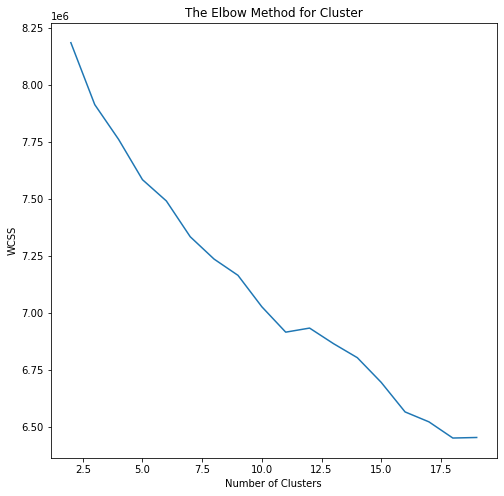

In [27]:
#Use elbow method to get the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]

for i in range(2,20):
    cls=KMeans(n_clusters=i, init='k-means++',random_state=5)
    cls.fit(X_train)
    wcss.append(cls.inertia_)


f,ax=plt.subplots(figsize=(8,8))
plt.subplot(1,1,1)
plt.plot(range(2,20),wcss)
plt.title('The Elbow Method for Cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [32]:
from sklearn.cluster import KMeans
cls=KMeans(n_clusters=11, init='k-means++',random_state=1)
cls.fit(X_train)


KMeans(n_clusters=11, random_state=1)

In [33]:
clust_train = cls.predict(X_train)
clust_test = cls.predict(X_test)

In [34]:
#pd.DataFrame(clust_train,columns=['cluster'])
clust_train2 = pd.get_dummies(pd.DataFrame(clust_train,columns=['cluster']), columns=['cluster'])
clust_test2 = pd.get_dummies(pd.DataFrame(clust_test,columns=['cluster']), columns=['cluster'])



In [35]:
scaler3 = StandardScaler()
scaler3 = scaler3.fit(clust_train2)
#scaler3.transform(clust_train2)
clust_train3 = pd.DataFrame(data=scaler3.transform(clust_train2), columns=clust_train2.columns)
clust_test3 = pd.DataFrame(data=scaler3.transform(clust_test2), columns=clust_test2.columns)
clust_test3.head()
#X_scl2 = pd.DataFrame(data=X_scl2, columns=X_scl.columns)

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,-0.407666,-0.385874,-0.167495,-0.470368,-0.336593,-0.344536,-0.088736,-0.451567,-0.045634,2.596644,-0.056129
1,-0.407666,-0.385874,-0.167495,-0.470368,-0.336593,2.902454,-0.088736,-0.451567,-0.045634,-0.385112,-0.056129
2,2.452990,-0.385874,-0.167495,-0.470368,-0.336593,-0.344536,-0.088736,-0.451567,-0.045634,-0.385112,-0.056129
3,-0.407666,-0.385874,-0.167495,-0.470368,-0.336593,-0.344536,-0.088736,-0.451567,-0.045634,2.596644,-0.056129
4,-0.407666,-0.385874,-0.167495,-0.470368,-0.336593,2.902454,-0.088736,-0.451567,-0.045634,-0.385112,-0.056129


## Test and Train set with new dot product features

In [36]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scl_new_feat12,y, stratify=y, random_state=1, shuffle=True, test_size=.2)

In [37]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128000 entries, 87925 to 96226
Columns: 467 entries, x0 to x7_x7
dtypes: float64(467)
memory usage: 457.0 MB


## Test and Train set with new dot product features and Clustering Features

In [38]:
X_train3 = X_train2.reset_index()[X_train2.columns]
X_test3 = X_test2.reset_index()[X_train2.columns]
for i in range(len(clust_train2.columns)):
    X_train3[clust_train2.columns[i]] = clust_train3[clust_train2.columns[i]]
    X_test3[clust_train2.columns[i]] = clust_test3[clust_train2.columns[i]]

In [64]:
X_train3.isna().mean()

x0            0.0
x1            0.0
x2            0.0
x3            0.0
x4            0.0
             ... 
cluster_6     0.0
cluster_7     0.0
cluster_8     0.0
cluster_9     0.0
cluster_10    0.0
Length: 478, dtype: float64

In [39]:
X_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128000 entries, 0 to 127999
Columns: 478 entries, x0 to cluster_10
dtypes: float64(478)
memory usage: 466.8 MB


## Test and Train with just clustering features

In [40]:
X_train4 = X_train.reset_index()[X_train.columns]
X_test4 = X_test.reset_index()[X_train.columns]
for i in range(len(clust_train2.columns)):
    X_train4[clust_train2.columns[i]] = clust_train3[clust_train2.columns[i]]
    X_test4[clust_train2.columns[i]] = clust_test3[clust_train2.columns[i]]

In [41]:
X_train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128000 entries, 0 to 127999
Data columns (total 78 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   x0             128000 non-null  float64
 1   x1             128000 non-null  float64
 2   x2             128000 non-null  float64
 3   x3             128000 non-null  float64
 4   x4             128000 non-null  float64
 5   x5             128000 non-null  float64
 6   x6             128000 non-null  float64
 7   x7             128000 non-null  float64
 8   x8             128000 non-null  float64
 9   x9             128000 non-null  float64
 10  x10            128000 non-null  float64
 11  x11            128000 non-null  float64
 12  x12            128000 non-null  float64
 13  x13            128000 non-null  float64
 14  x14            128000 non-null  float64
 15  x15            128000 non-null  float64
 16  x16            128000 non-null  float64
 17  x17            128000 non-nul

#### Random Forest

In [ ]:
rf = RandomForestClassifier()

pipeline = Pipeline([
    ('clf', rf)
])

parameters = { 'clf__min_samples_leaf':[1,5]
              ,'clf__min_samples_split':[2,4,6]
              ,'clf__max_depth':[None]
              ,'clf__class_weight': ['balanced','balanced_subsample']
              ,'clf__random_state': [1]
              ,'clf__criterion':['entropy']
              ,'clf__n_estimators':[300, 500]
             }

rfGridSearch = RandomizedSearchCV(pipeline, param_distributions=parameters, cv=cv, n_jobs=5, verbose=1, scoring='roc_auc')

rfGridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('clf',
                                              RandomForestClassifier())]),
                   n_jobs=5,
                   param_distributions={'clf__class_weight': ['balanced',
                                                              'balanced_subsample'],
                                        'clf__criterion': ['entropy'],
                                        'clf__max_depth': [None],
                                        'clf__min_samples_leaf': [1, 5],
                                        'clf__min_samples_split': [2, 4, 6],
                                        'clf__n_estimators': [300, 500],
                                        'clf__random_state': [1]},
                   scoring='roc_auc', verbose=1)

In [ ]:
rfGridSearch.best_estimator_

Pipeline(steps=[('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', n_estimators=500,
                                        random_state=1))])

In [ ]:
conf = mt.confusion_matrix(y_test, rfGridSearch.predict(X_test))
print("confusion matrix\n",conf)

confusion matrix
 [[18371   790]
 [ 1558 11281]]


In [ ]:
rf_model = RandomForestClassifier(max_features= 'auto', bootstrap=True, random_state=1, class_weight='balanced',
                                  n_estimators= 500, criterion='entropy', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf= 1).fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_rf))
print('\n')
print('Accuracy: \n', accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     19161
           1       0.93      0.88      0.91     12839

    accuracy                           0.93     32000
   macro avg       0.93      0.92      0.92     32000
weighted avg       0.93      0.93      0.93     32000



Confusion Matrix: 
 [[18371   790]
 [ 1558 11281]]


Accuracy: 
 0.926625


In [ ]:
recall = mt.recall_score(y_test, y_pred_rf)
print("recall\n",recall)

recall
 0.8786509852792274


In [ ]:
precision = mt.precision_score(y_test, y_pred_rf)
print("precision\n",precision)

precision
 0.9345538894872008


#### SGD

In [ ]:
parameters_SGD = {'alpha':[.0001,.001,.01,.1,1,10,100,200], 'max_iter':[500,1000,1500,2000]}

In [ ]:
%%time
SGD_GridSearch = GridSearchCV(SGDClassifier(loss='hinge', penalty='l2',shuffle=True, n_jobs=7,
                                            learning_rate='optimal',early_stopping=True, validation_fraction= .1, 
                                            n_iter_no_change=10,class_weight='balanced', verbose=1, random_state=1),
                              param_grid=parameters_SGD, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')
SGD_GridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
-- Epoch 1
Norm: 0.83, NNZs: 67, Bias: -0.105623, T: 115200, Avg. loss: 0.632584
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.82, NNZs: 67, Bias: -0.104380, T: 230400, Avg. loss: 0.624465
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 0.82, NNZs: 67, Bias: -0.104098, T: 345600, Avg. loss: 0.624501
Total training time: 0.17 seconds.
-- Epoch 4
Norm: 0.82, NNZs: 67, Bias: -0.106332, T: 460800, Avg. loss: 0.624665
Total training time: 0.24 seconds.
-- Epoch 5
Norm: 0.82, NNZs: 67, Bias: -0.105930, T: 576000, Avg. loss: 0.624145
Total training time: 0.31 seconds.
-- Epoch 6
Norm: 0.82, NNZs: 67, Bias: -0.105792, T: 691200, Avg. loss: 0.624087
Total training time: 0.37 seconds.
-- Epoch 7
Norm: 0.82, NNZs: 67, Bias: -0.104632, T: 806400, Avg. loss: 0.623858
Total training time: 0.43 seconds.
-- Epoch 8
Norm: 0.82, NNZs: 67, Bias: -0.104489, T: 921600, Avg. loss: 0.623986
Total training time: 0.50 seconds.
-- Epoch 9

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SGDClassifier(class_weight='balanced',
                                     early_stopping=True, n_iter_no_change=10,
                                     n_jobs=7, random_state=1, verbose=1),
             n_jobs=7,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200],
                         'max_iter': [500, 1000, 1500, 2000]},
             scoring='accuracy', verbose=1)

In [ ]:
SGD_GridSearch.best_estimator_

SGDClassifier(alpha=0.1, class_weight='balanced', early_stopping=True,
              max_iter=500, n_iter_no_change=10, n_jobs=7, random_state=1,
              verbose=1)

In [ ]:
conf = mt.confusion_matrix(y_test, SGD_GridSearch.predict(X_test))
print("confusion matrix\n",conf)

confusion matrix
 [[14293  4868]
 [ 4485  8354]]


In [ ]:
%%time
SGD_clf = SGDClassifier(alpha=.1, max_iter=500, loss='hinge', penalty='l2',shuffle=True, n_jobs=7,
                        learning_rate='optimal',early_stopping=True, validation_fraction= .1, 
                        n_iter_no_change=10,class_weight='balanced', verbose=1, random_state=1).fit(X_train, y_train)
y_pred_SGD = SGD_clf.predict(X_test)

-- Epoch 1
Norm: 0.83, NNZs: 67, Bias: -0.105623, T: 115200, Avg. loss: 0.632584
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.82, NNZs: 67, Bias: -0.104380, T: 230400, Avg. loss: 0.624465
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 0.82, NNZs: 67, Bias: -0.104098, T: 345600, Avg. loss: 0.624501
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 0.82, NNZs: 67, Bias: -0.106332, T: 460800, Avg. loss: 0.624665
Total training time: 0.23 seconds.
-- Epoch 5
Norm: 0.82, NNZs: 67, Bias: -0.105930, T: 576000, Avg. loss: 0.624145
Total training time: 0.29 seconds.
-- Epoch 6
Norm: 0.82, NNZs: 67, Bias: -0.105792, T: 691200, Avg. loss: 0.624087
Total training time: 0.35 seconds.
-- Epoch 7
Norm: 0.82, NNZs: 67, Bias: -0.104632, T: 806400, Avg. loss: 0.623858
Total training time: 0.42 seconds.
-- Epoch 8
Norm: 0.82, NNZs: 67, Bias: -0.104489, T: 921600, Avg. loss: 0.623986
Total training time: 0.49 seconds.
-- Epoch 9
Norm: 0.82, NNZs: 67, Bias: -0.104482, T: 1036800, Avg. loss:

In [ ]:
print(classification_report(y_test, y_pred_SGD))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_SGD))
print('\n')
print('Accuracy: \n', accuracy_score(y_test, y_pred_SGD))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75     19161
           1       0.63      0.65      0.64     12839

    accuracy                           0.71     32000
   macro avg       0.70      0.70      0.70     32000
weighted avg       0.71      0.71      0.71     32000



Confusion Matrix: 
 [[14293  4868]
 [ 4485  8354]]


Accuracy: 
 0.70771875


In [ ]:
recall = mt.recall_score(y_test, y_pred_SGD)
print("recall\n",recall)

recall
 0.6506737284835268


In [ ]:
precision = mt.precision_score(y_test,y_pred_SGD)
print("precision\n",precision)

precision
 0.6318257449705037


#### XGBoost

In [ ]:
tuned_xgb_parameters = {'n_estimators': [300, 500], 'learning_rate':[1,.1,.01], 'colsample_bytree': [.4,.5,.6,1], 
                        'reg_alpha': [100,50,10,1,.1,.01,.001], 'max_depth':[4,6,9]}

In [63]:
scale_pos_weight = (len(y)-sum(y))/sum(y)
print(scale_pos_weight)

1.4923283019455738


In [ ]:
%%time
optimal_xgb = RandomizedSearchCV(
   estimator=xgboost.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='aucpr',
                          subsample=0.8,
                          scale_pos_weight=scale_pos_weight,
                          random_state=1,
                          use_label_encoder=False),
     param_distributions=tuned_xgb_parameters,
     scoring='roc_auc', 
     verbose=1,
     n_jobs =5,
     cv = cv, n_iter=20)

optimal_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)], verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[0]	validation_0-aucpr:0.85949
[1]	validation_0-aucpr:0.88692
[2]	validation_0-aucpr:0.90722
[3]	validation_0-aucpr:0.91487
[4]	validation_0-aucpr:0.92022
[5]	validation_0-aucpr:0.92423
[6]	validation_0-aucpr:0.92698
[7]	validation_0-aucpr:0.93004
[8]	validation_0-aucpr:0.93421
[9]	validation_0-aucpr:0.93619
[10]	validation_0-aucpr:0.93753
[11]	validation_0-aucpr:0.93991
[12]	validation_0-aucpr:0.94121
[13]	validation_0-aucpr:0.94386
[14]	validation_0-aucpr:0.94480
[15]	validation_0-aucpr:0.94559
[16]	validation_0-aucpr:0.94696
[17]	validation_0-aucpr:0.94812
[18]	validation_0-aucpr:0.94917
[19]	validation_0-aucpr:0.95033
[20]	validation_0-aucpr:0.95133
[21]	validation_0-aucpr:0.95249
[22]	validation_0-aucpr:0.95335
[23]	validation_0-aucpr:0.95436
[24]	validation_0-aucpr:0.95529
[25]	validation_0-aucpr:0.95644
[26]	validation_0-aucpr:0.95714
[27]	validation_0-aucpr:0.95746
[28]	validation_0-aucpr:0.95816
[29]	validation_0-au

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='aucpr', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None...
                                           scale_pos_weight=1.4923283019455738,
                                           subsample=0.8, tree_method=None,
                                           use_label_encoder=False,
                                           v

In [ ]:
print(optimal_xgb.best_params_)

{'reg_alpha': 0.001, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [ ]:
xgb_clf = xgboost.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='aucpr',
                          subsample=0.8,
                          scale_pos_weight=scale_pos_weight,
                          random_state=1,
                          use_label_encoder=False,
                          reg_alpha=.001,
                          n_estimators=300,
                          max_depth=9,
                          learning_rate=.1,
                          colsample_bytree=1)


xgb_clf.fit(X_train, y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_train, y_train),(X_test, y_test)])

y_pred_xgb = xgb_clf.predict(X_test)

[0]	validation_0-aucpr:0.88035	validation_1-aucpr:0.85949
[1]	validation_0-aucpr:0.90356	validation_1-aucpr:0.88692
[2]	validation_0-aucpr:0.92328	validation_1-aucpr:0.90722
[3]	validation_0-aucpr:0.93048	validation_1-aucpr:0.91487
[4]	validation_0-aucpr:0.93584	validation_1-aucpr:0.92022
[5]	validation_0-aucpr:0.93961	validation_1-aucpr:0.92423
[6]	validation_0-aucpr:0.94247	validation_1-aucpr:0.92698
[7]	validation_0-aucpr:0.94606	validation_1-aucpr:0.93004
[8]	validation_0-aucpr:0.95011	validation_1-aucpr:0.93421
[9]	validation_0-aucpr:0.95170	validation_1-aucpr:0.93619
[10]	validation_0-aucpr:0.95365	validation_1-aucpr:0.93753
[11]	validation_0-aucpr:0.95634	validation_1-aucpr:0.93991
[12]	validation_0-aucpr:0.95748	validation_1-aucpr:0.94121
[13]	validation_0-aucpr:0.95999	validation_1-aucpr:0.94386
[14]	validation_0-aucpr:0.96108	validation_1-aucpr:0.94480
[15]	validation_0-aucpr:0.96237	validation_1-aucpr:0.94559
[16]	validation_0-aucpr:0.96379	validation_1-aucpr:0.94696
[17]	va

[139]	validation_0-aucpr:0.99425	validation_1-aucpr:0.97281
[140]	validation_0-aucpr:0.99435	validation_1-aucpr:0.97284
[141]	validation_0-aucpr:0.99437	validation_1-aucpr:0.97286
[142]	validation_0-aucpr:0.99448	validation_1-aucpr:0.97286
[143]	validation_0-aucpr:0.99450	validation_1-aucpr:0.97287
[144]	validation_0-aucpr:0.99465	validation_1-aucpr:0.97305
[145]	validation_0-aucpr:0.99469	validation_1-aucpr:0.97306
[146]	validation_0-aucpr:0.99470	validation_1-aucpr:0.97307
[147]	validation_0-aucpr:0.99475	validation_1-aucpr:0.97310
[148]	validation_0-aucpr:0.99481	validation_1-aucpr:0.97309
[149]	validation_0-aucpr:0.99481	validation_1-aucpr:0.97309
[150]	validation_0-aucpr:0.99492	validation_1-aucpr:0.97308
[151]	validation_0-aucpr:0.99506	validation_1-aucpr:0.97329
[152]	validation_0-aucpr:0.99512	validation_1-aucpr:0.97331
[153]	validation_0-aucpr:0.99523	validation_1-aucpr:0.97330
[154]	validation_0-aucpr:0.99532	validation_1-aucpr:0.97327
[155]	validation_0-aucpr:0.99536	validat

In [ ]:
print(classification_report(y_test, y_pred_xgb))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_xgb))
print('\n')
print('Accuracy: \n', accuracy_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     19161
           1       0.92      0.93      0.92     12839

    accuracy                           0.94     32000
   macro avg       0.93      0.94      0.93     32000
weighted avg       0.94      0.94      0.94     32000



Confusion Matrix: 
 [[18071  1090]
 [  916 11923]]


Accuracy: 
 0.9373125


In [ ]:
recall = mt.recall_score(y_test, y_pred_xgb)
print("recall\n",recall)

recall
 0.9286548796635252


In [ ]:
precision = mt.precision_score(y_test, y_pred_xgb)
print("precision\n",precision)

precision
 0.9162376085453009


In [ ]:
evaluation_results = xgb_clf.evals_result()
train_auc_tree = evaluation_results['validation_0']['aucpr']
test_auc_tree = evaluation_results['validation_1']['aucpr']

In [ ]:
evaluation_output = pd.DataFrame(zip(train_auc_tree, test_auc_tree), columns=('train_auc_aucpr', 'test_auc_aucpr'))
evaluation_output.head()

,train_auc_aucpr,test_auc_aucpr
0,0.880351,0.859488
1,0.903563,0.886918
2,0.923280,0.907225
3,0.930476,0.914871
4,0.935838,0.920220


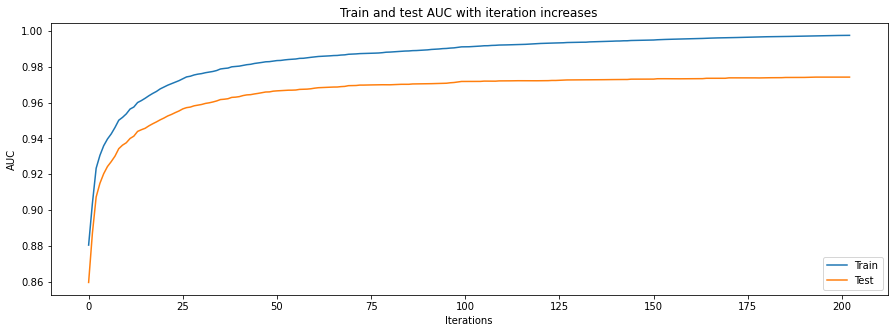

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(test_auc_tree, label='Test')

plt.title("Train and test AUC with iteration increases")
plt.xlabel("Iterations")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

#### Dense Neural Network

In [26]:
model_seq = tf.keras.Sequential()

In [27]:
model_seq.add(tf.keras.Input(shape=(67,)))
model_seq.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [28]:
neg, pos = np.bincount(df['y'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 160000
    Positive: 64197 (40.12% of total)



In [29]:
y.value_counts()

0    95803
1    64197
Name: y, dtype: int64

In [30]:
neg

95803

In [31]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.84
Weight for class 1: 1.25


In [32]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=.001, patience=5, restore_best_weights=True)

In [33]:
fname = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=fname, monitor='val_loss', mode='min', save_best_only=True)

In [34]:
model_seq.compile(optimizer='adam', loss='BinaryCrossentropy', metrics='accuracy')

In [35]:
model_history = model_seq.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=1000,
                              class_weight=class_weight, callbacks=[early_stop, checkpoint])

Epoch 1/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3218 - accuracy: 0.8573 - val_loss: 0.2204 - val_accuracy: 0.9110
Epoch 2/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1856 - accuracy: 0.9288 - val_loss: 0.1750 - val_accuracy: 0.9330
Epoch 3/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1476 - accuracy: 0.9460 - val_loss: 0.1496 - val_accuracy: 0.9458
Epoch 4/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1266 - accuracy: 0.9565 - val_loss: 0.1351 - val_accuracy: 0.9521
Epoch 5/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1138 - accuracy: 0.9611 - val_loss: 0.1315 - val_accuracy: 0.9553
Epoch 6/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1038 - accuracy: 0.9655 - val_loss: 0.1264 - val_accuracy: 0.9565
Epoch 7/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0962 - accuracy: 0.9682 - val_loss: 0.1222 -

In [36]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               6800      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 47,301
Trainable params: 47,301
Non-trainable params: 0
____________________________________________________

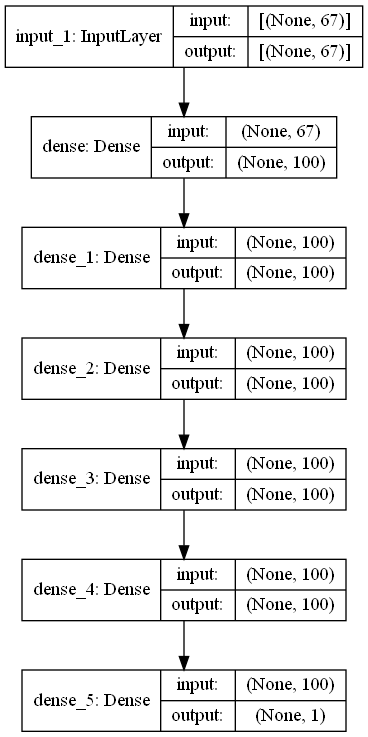

In [37]:
plot_model(model_seq, show_shapes=True)

In [38]:
def plot_training_curves(history, title=None):
    ''' Plot the training curves for loss and accuracy given a model history
    '''
    # find the minimum loss epoch
    minimum = np.min(history.history['val_loss'])
    min_loc = np.where(minimum == history.history['val_loss'])[0]
    # get the vline y-min and y-max
    loss_min, loss_max = (min(history.history['val_loss'] + history.history['loss']),
                          max(history.history['val_loss'] + history.history['loss']))
    acc_min, acc_max = (min(history.history['val_accuracy'] + history.history['accuracy']),
                        max(history.history['val_accuracy'] + history.history['accuracy']))
    # create figure
    fig, ax = plt.subplots(ncols=2, figsize = (15,7))
    fig.suptitle(title)
    index = np.arange(1, len(history.history['accuracy']) + 1)
    # plot the loss and validation loss
    ax[0].plot(index, history.history['loss'], label = 'loss')
    ax[0].plot(index, history.history['val_loss'], label = 'val_loss')
    ax[0].vlines(min_loc + 1, loss_min, loss_max, label = 'min_loss_location',linestyle='dashed')
    ax[0].set_title('Loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].legend()
    # plot the accuracy and validation accuracy
    ax[1].plot(index, history.history['accuracy'], label = 'accuracy')
    ax[1].plot(index, history.history['val_accuracy'], label = 'val_accuracy')
    ax[1].vlines(min_loc + 1, acc_min, acc_max, label = 'min loss Epoch',linestyle='dashed')
    ax[1].set_title('Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].legend()
    plt.show()

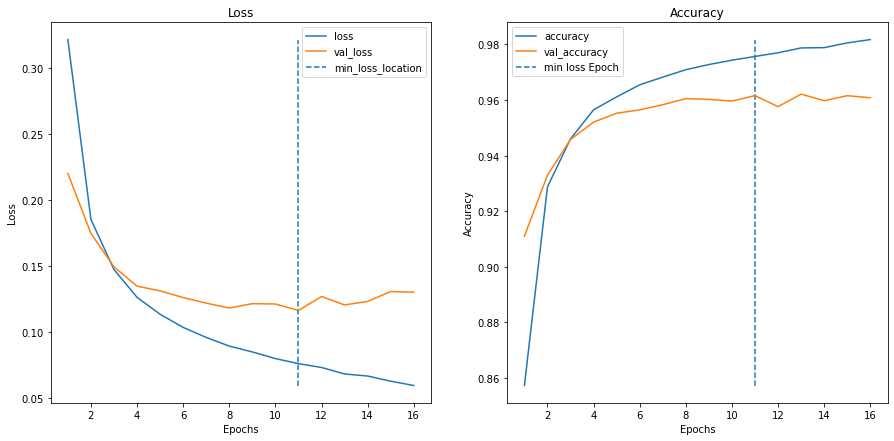

In [39]:
plot_training_curves(model_history)

In [40]:
y_pred_seq = model_seq.predict(X_test)

In [41]:
print(mt.classification_report(y_test, np.rint(y_pred_seq)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(y_pred_seq)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(y_pred_seq)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19161
           1       0.95      0.95      0.95     12839

    accuracy                           0.96     32000
   macro avg       0.96      0.96      0.96     32000
weighted avg       0.96      0.96      0.96     32000



Confusion Matrix: 
 [[18542   619]
 [  610 12229]]


Accuracy: 
 0.96159375


In [42]:
y_test.value_counts()

0    19161
1    12839
Name: y, dtype: int64

##### There are 18508 instances in class 0 were predicted as class 0 and 12157 instances in class 1 were predicted as class 1
#### 653 instances in class 0 were incorrectly predicted to class 1 and 682 instances in class 1 were incorrectly predicted to class 0.
#### Therefore, based on the problem statement, if class 0 was predicted to class 1, there is 653 X 100 loss. If class 1 was predicted to class 0, there is 682 X 25 loss. So the total loss of this model is 65300+17050=82350
#### The prediction has 682 false negative (recall) and 653 false positive (precision), so we have to find a balance between precision and recall

In [43]:
recall = mt.recall_score(y_test, np.rint(y_pred_seq))
print("recall\n",recall)

recall
 0.9524885115663214


In [44]:
precision = mt.precision_score(y_test, np.rint(y_pred_seq))
print("precision\n",precision)

precision
 0.9518212951432129


#### Threshold analysis

#### Use Dense Neural Network result

In [45]:
def threshold_test(y,perc):
    if y >= perc:
        x = 1
    else:
        x= 0
    return x

In [46]:
cutoff_df = pd.DataFrame({'Actual':y_test.tolist(),'Predicted':list(np.rint(y_pred_seq)),
                          'class' :y_pred_seq.ravel()})

In [47]:
cutoff_df.head()

,Actual,Predicted,class
0,1,[1.0],0.999201
1,1,[1.0],0.986493
2,1,[1.0],0.999543
3,0,[0.0],0.003953
4,1,[1.0],0.999896


In [48]:
precision_list = []
recall_list = []
accuracy_list = []
f1_score_list = []
threshold_list = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for i in range(len(threshold_list)):
    thresh_preds = []
    for j in range(len(cutoff_df)):
        thresh_preds.append(threshold_test(cutoff_df[j:j+1]['class'].values[0],threshold_list[i]))
    recall_list.append(mt.recall_score(y_test,thresh_preds))
    precision_list.append(mt.precision_score(y_test,thresh_preds)) 
    accuracy_list.append(accuracy_score(y_test,thresh_preds))
    f1_score_list.append(f1_score(y_test,thresh_preds))

In [49]:
cutoff_results_df = pd.DataFrame({'Threshold':threshold_list,'Accuracy':accuracy_list,'Precision' :precision_list,
                                  'Recall' :recall_list,'F1_Score':f1_score_list})

In [50]:
cutoff_results_df.head()

,Threshold,Accuracy,Precision,Recall,F1_Score
0,0.1,0.942063,0.887041,0.980450,0.931410
1,0.2,0.953531,0.917230,0.971883,0.943766
2,0.3,0.957562,0.931325,0.965418,0.948065
3,0.4,0.960594,0.943602,0.959109,0.951292
4,0.5,0.961594,0.951821,0.952489,0.952155


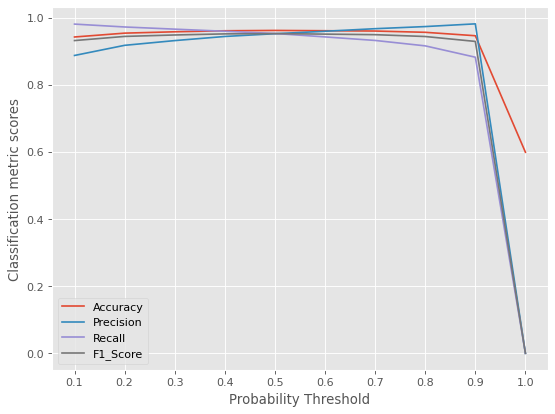

In [51]:
figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
plt.plot(cutoff_results_df['Accuracy'], label='Accuracy')
plt.plot(cutoff_results_df['Precision'], label='Precision')
plt.plot(cutoff_results_df['Recall'], label='Recall')
plt.plot(cutoff_results_df['F1_Score'], label='F1_Score')
plt.xticks(list(range(cutoff_results_df.shape[0])), cutoff_results_df['Threshold'])
plt.xlabel('Probability Threshold')
plt.ylabel('Classification metric scores')
plt.legend()
plt.show()

#### Let's try to use precision and recall metrics in dense NN along with different thresholds.

#### Precision train with thresholds = 1

In [ ]:
model_seq_1 = tf.keras.Sequential()
model_seq_1.add(tf.keras.Input(shape=(67,)))
model_seq_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_seq_1.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Precision(thresholds=1)])

In [ ]:
model_history_1 = model_seq_1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=1000,
                              class_weight=class_weight, callbacks=[early_stop, checkpoint])

Epoch 1/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3250 - precision_2: 0.0000e+00 - val_loss: 0.2306 - val_precision_2: 0.0000e+00
Epoch 2/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1893 - precision_2: 0.0000e+00 - val_loss: 0.1708 - val_precision_2: 0.0000e+00
Epoch 3/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1480 - precision_2: 0.0000e+00 - val_loss: 0.1592 - val_precision_2: 0.0000e+00
Epoch 4/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1278 - precision_2: 0.0000e+00 - val_loss: 0.1419 - val_precision_2: 0.0000e+00
Epoch 5/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1138 - precision_2: 0.0000e+00 - val_loss: 0.1373 - val_precision_2: 0.0000e+00
Epoch 6/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1064 - precision_2: 0.0000e+00 - val_loss: 0.1247 - val_precision_2: 0.0000e+00
Epoch 7/1000
1000/1000 [================

In [ ]:
y_pred_seq_1 = model_seq_1.predict(X_test)

In [ ]:
print(mt.classification_report(y_test, np.rint(y_pred_seq_1)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(y_pred_seq_1)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(y_pred_seq_1)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19161
           1       0.95      0.95      0.95     12839

    accuracy                           0.96     32000
   macro avg       0.96      0.96      0.96     32000
weighted avg       0.96      0.96      0.96     32000



Confusion Matrix: 
 [[18544   617]
 [  653 12186]]


Accuracy: 
 0.9603125


#### 617 X 100+ 653 X25 = 78025

#### Recall train with thresholds=.9

In [ ]:
model_seq_2 = tf.keras.Sequential()
model_seq_2.add(tf.keras.Input(shape=(67,)))
model_seq_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_seq_2.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(thresholds=.9)])

In [ ]:
model_history_2 = model_seq_2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=1000,
                              class_weight=class_weight, callbacks=[early_stop, checkpoint])

Epoch 1/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3170 - recall_1: 0.5153 - val_loss: 0.2322 - val_recall_1: 0.6935
Epoch 2/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1876 - recall_1: 0.7558 - val_loss: 0.1746 - val_recall_1: 0.7527
Epoch 3/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1480 - recall_1: 0.8188 - val_loss: 0.1515 - val_recall_1: 0.8047
Epoch 4/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1275 - recall_1: 0.8529 - val_loss: 0.1428 - val_recall_1: 0.8051
Epoch 5/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1153 - recall_1: 0.8735 - val_loss: 0.1317 - val_recall_1: 0.8526
Epoch 6/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1065 - recall_1: 0.8855 - val_loss: 0.1287 - val_recall_1: 0.8441
Epoch 7/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0992 - recall_1: 0.8968 - val_loss: 0.1335 -

In [ ]:
y_pred_seq_2 = model_seq_2.predict(X_test)

In [ ]:
print(mt.classification_report(y_test, np.rint(y_pred_seq_2)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(y_pred_seq_2)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(y_pred_seq_2)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19161
           1       0.95      0.95      0.95     12839

    accuracy                           0.96     32000
   macro avg       0.96      0.96      0.96     32000
weighted avg       0.96      0.96      0.96     32000



Confusion Matrix: 
 [[18555   606]
 [  657 12182]]


Accuracy: 
 0.96053125


#### 606X100+657X25 = 77025 (Second Lowest)

#### Recall train with thresholds=1

In [ ]:
model_seq_3 = tf.keras.Sequential()
model_seq_3.add(tf.keras.Input(shape=(67,)))
model_seq_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_seq_3.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(thresholds=1)])

In [ ]:
model_history_3 = model_seq_3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=1000,
                              class_weight=class_weight, callbacks=[early_stop, checkpoint])

Epoch 1/1000
1000/1000 [==============================] - 3s 2ms/step - loss: 0.3261 - recall_2: 0.0000e+00 - val_loss: 0.2309 - val_recall_2: 0.0000e+00
Epoch 2/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1915 - recall_2: 0.0000e+00 - val_loss: 0.1829 - val_recall_2: 0.0000e+00
Epoch 3/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1515 - recall_2: 0.0000e+00 - val_loss: 0.1502 - val_recall_2: 0.0000e+00
Epoch 4/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1323 - recall_2: 0.0000e+00 - val_loss: 0.1414 - val_recall_2: 0.0000e+00
Epoch 5/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1182 - recall_2: 0.0000e+00 - val_loss: 0.1420 - val_recall_2: 0.0000e+00
Epoch 6/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1082 - recall_2: 0.0000e+00 - val_loss: 0.1324 - val_recall_2: 0.0000e+00
Epoch 7/1000
1000/1000 [==============================] - 2s 2ms/step - loss

In [ ]:
y_pred_seq_3 = model_seq_3.predict(X_test)

In [ ]:
print(mt.classification_report(y_test, np.rint(y_pred_seq_3)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(y_pred_seq_3)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(y_pred_seq_3)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     19161
           1       0.95      0.95      0.95     12839

    accuracy                           0.96     32000
   macro avg       0.96      0.96      0.96     32000
weighted avg       0.96      0.96      0.96     32000



Confusion Matrix: 
 [[18482   679]
 [  632 12207]]


Accuracy: 
 0.95903125


#### 679X100+632X25 = 83700

#### Customize metrics

In [57]:
def money_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    tp = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    tp_fp = K.sum(K.round(K.clip(y_pred, 0,1)))
    tp_fn = K.sum(K.round(K.clip(y_true, 0,1)))
    total_loss = (tp_fp-tp) * 100 + (tp_fn-tp) * 250
    return -total_loss

In [ ]:
model_seq_4 = tf.keras.Sequential()
model_seq_4.add(tf.keras.Input(shape=(67,)))
model_seq_4.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_4.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_4.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_4.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_4.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_4.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_seq_4.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=[money_loss])

In [ ]:
model_history_4 = model_seq_4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=1000,
                              class_weight=class_weight, callbacks=[early_stop, checkpoint])

Epoch 1/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3212 - money_loss: -1264.6500 - val_loss: 0.2439 - val_money_loss: -1019.3000
Epoch 2/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1907 - money_loss: -670.6750 - val_loss: 0.1814 - val_money_loss: -650.3000
Epoch 3/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1526 - money_loss: -504.2000 - val_loss: 0.1630 - val_money_loss: -584.1000
Epoch 4/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1324 - money_loss: -423.5750 - val_loss: 0.1419 - val_money_loss: -435.8000
Epoch 5/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1177 - money_loss: -365.4000 - val_loss: 0.1354 - val_money_loss: -390.2000
Epoch 6/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1071 - money_loss: -321.1000 - val_loss: 0.1343 - val_money_loss: -418.8000
Epoch 7/1000
1000/1000 [==============================] - 1s 1

In [ ]:
y_pred_seq_4 = model_seq_4.predict(X_test)

In [ ]:
print(mt.classification_report(y_test, np.rint(y_pred_seq_4)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(y_pred_seq_4)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(y_pred_seq_4)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     19161
           1       0.96      0.94      0.95     12839

    accuracy                           0.96     32000
   macro avg       0.96      0.96      0.96     32000
weighted avg       0.96      0.96      0.96     32000



Confusion Matrix: 
 [[18595   566]
 [  722 12117]]


Accuracy: 
 0.95975


#### 566 X 100+722X25 =74650

In [ ]:
tf.random.set_seed(1)

In [ ]:
#Add batch normalization to stablize the result
model_seq_5 = tf.keras.Sequential()
model_seq_5.add(tf.keras.Input(shape=(67,)))
model_seq_5.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_5.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_5.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_5.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_5.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_5.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_5.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_5.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_5.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_5.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_5.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_seq_5.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=[money_loss])

In [ ]:
model_history_5 = model_seq_5.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=1000,
                              class_weight=class_weight, callbacks=[early_stop, checkpoint])

Epoch 1/1000
1000/1000 [==============================] - 4s 3ms/step - loss: 0.3656 - money_loss: -1525.0250 - val_loss: 0.2387 - val_money_loss: -865.1000
Epoch 2/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2052 - money_loss: -717.9500 - val_loss: 0.1685 - val_money_loss: -527.8000
Epoch 3/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1620 - money_loss: -532.2250 - val_loss: 0.1467 - val_money_loss: -468.6000
Epoch 4/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1398 - money_loss: -454.1750 - val_loss: 0.1412 - val_money_loss: -437.0000
Epoch 5/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1273 - money_loss: -401.0000 - val_loss: 0.1247 - val_money_loss: -376.6000
Epoch 6/1000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1180 - money_loss: -365.7250 - val_loss: 0.1277 - val_money_loss: -411.4000
Epoch 7/1000
1000/1000 [==============================] - 3s 3m

In [ ]:
y_pred_seq_5 = model_seq_5.predict(X_test)

In [ ]:
print(mt.classification_report(y_test, np.rint(y_pred_seq_5)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(y_pred_seq_5)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(y_pred_seq_5)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19161
           1       0.96      0.96      0.96     12839

    accuracy                           0.97     32000
   macro avg       0.96      0.96      0.96     32000
weighted avg       0.97      0.97      0.97     32000



Confusion Matrix: 
 [[18610   551]
 [  552 12287]]


Accuracy: 
 0.96553125


#### 551 X 100+552X25 =68900 (Loweset)

In [ ]:
(551*100 + 250*552)/(551+552+18610+12287)

6.034375

## Tensor flow with only dot product features

In [46]:
tf.random.set_seed(1)

In [47]:
model_seq_6 = tf.keras.Sequential()
model_seq_6.add(tf.keras.Input(shape=(467,)))
model_seq_6.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_6.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_6.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_6.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_6.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_6.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_6.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_6.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_6.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_6.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_6.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_6.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_6.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_6.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_6.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_6.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_6.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [48]:
model_seq_6.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=[money_loss])

In [51]:
model_history_6 = model_seq_6.fit(X_train2, y_train, validation_data=(X_test2, y_test), batch_size=128, epochs=1000,
                              class_weight=class_weight, callbacks=[early_stop, checkpoint])

Epoch 1/1000
1000/1000 [==============================] - 18s 13ms/step - loss: 0.2652 - money_loss: -2281.2500 - val_loss: 0.1730 - val_money_loss: -1307.2000
Epoch 2/1000
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1669 - money_loss: -1276.2000 - val_loss: 0.1473 - val_money_loss: -1212.8000
Epoch 3/1000
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1447 - money_loss: -1074.5000 - val_loss: 0.1304 - val_money_loss: -1020.2000
Epoch 4/1000
1000/1000 [==============================] - 10s 10ms/step - loss: 0.1314 - money_loss: -952.4500 - val_loss: 0.1282 - val_money_loss: -959.8000
Epoch 5/1000
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1239 - money_loss: -887.3500 - val_loss: 0.1256 - val_money_loss: -892.8000
Epoch 6/1000
1000/1000 [==============================] - 9s 9ms/step - loss: 0.1180 - money_loss: -847.6000 - val_loss: 0.1205 - val_money_loss: -881.4000
Epoch 7/1000
1000/1000 [==========================

In [52]:
y_pred_seq_6 = model_seq_6.predict(X_test2)

In [53]:
print(mt.classification_report(y_test, np.rint(y_pred_seq_6)))
print('\n')
cf1 = mt.confusion_matrix(y_test, np.rint(y_pred_seq_6))
print('Confusion Matrix: \n', cf1)
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(y_pred_seq_6)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19161
           1       0.95      0.95      0.95     12839

    accuracy                           0.96     32000
   macro avg       0.96      0.96      0.96     32000
weighted avg       0.96      0.96      0.96     32000



Confusion Matrix: 
 [[18516   645]
 [  614 12225]]


Accuracy: 
 0.96065625


In [54]:

print("dollars per prediction: ",(cf1[1][0]*100 + cf1[0][1]*250)/len(y_test))
(cf1[1][0]*100 + cf1[0][1]*250)/len(y_test)

dollars per prediction


6.9578125

## Tensor flow with only cluster features

In [57]:
tf.random.set_seed(1)
model_seq_7 = tf.keras.Sequential()
model_seq_7.add(tf.keras.Input(shape=(78,)))
model_seq_7.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_7.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_7.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_7.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_7.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_7.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_7.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_7.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_7.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_7.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_7.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_7.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_7.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_7.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_7.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_7.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_7.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [58]:
model_seq_7.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=[money_loss])

In [59]:
model_history_7 = model_seq_7.fit(X_train4, y_train, validation_data=(X_test4, y_test), batch_size=128, epochs=1000,
                              class_weight=class_weight, callbacks=[early_stop, checkpoint])

Epoch 1/1000
1000/1000 [==============================] - 15s 13ms/step - loss: 0.4171 - money_loss: -4149.3501 - val_loss: 0.2779 - val_money_loss: -2346.2000
Epoch 2/1000
1000/1000 [==============================] - 17s 17ms/step - loss: 0.2424 - money_loss: -2003.4000 - val_loss: 0.1951 - val_money_loss: -1624.6000
Epoch 3/1000
1000/1000 [==============================] - 15s 15ms/step - loss: 0.1842 - money_loss: -1438.5500 - val_loss: 0.1613 - val_money_loss: -1271.2000
Epoch 4/1000
1000/1000 [==============================] - 15s 15ms/step - loss: 0.1576 - money_loss: -1188.0000 - val_loss: 0.1460 - val_money_loss: -1113.2000
Epoch 5/1000
1000/1000 [==============================] - 16s 16ms/step - loss: 0.1411 - money_loss: -1047.5000 - val_loss: 0.1320 - val_money_loss: -979.0000
Epoch 6/1000
1000/1000 [==============================] - 14s 14ms/step - loss: 0.1294 - money_loss: -939.1500 - val_loss: 0.1324 - val_money_loss: -931.0000
Epoch 7/1000
1000/1000 [===================

In [60]:
y_pred_seq_7 = model_seq_7.predict(X_test4)

In [61]:
print(mt.classification_report(y_test, np.rint(y_pred_seq_7)))
print('\n')
cf1 = mt.confusion_matrix(y_test, np.rint(y_pred_seq_7))
print('Confusion Matrix: \n', cf1)
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(y_pred_seq_7)))
print("dollars per prediction: ",(cf1[1][0]*100 + cf1[0][1]*250)/len(y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19161
           1       0.95      0.96      0.96     12839

    accuracy                           0.97     32000
   macro avg       0.96      0.96      0.96     32000
weighted avg       0.97      0.97      0.97     32000



Confusion Matrix: 
 [[18549   612]
 [  491 12348]]


Accuracy: 
 0.96553125
dollars per prediction:  6.315625


## Tensor flow with dot product and cluster features

In [64]:
tf.random.set_seed(1)
model_seq_8 = tf.keras.Sequential()
model_seq_8.add(tf.keras.Input(shape=(478,)))
model_seq_8.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_8.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_8.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_8.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_8.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_8.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_8.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_8.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_8.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_8.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_8.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_8.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_8.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_8.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_8.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq_8.add(tf.keras.layers.BatchNormalization(momentum=0.8))
model_seq_8.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [65]:
model_seq_8.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=[money_loss])

In [66]:
model_history_8 = model_seq_8.fit(X_train3, y_train, validation_data=(X_test3, y_test), batch_size=128, epochs=1000,
                              class_weight=class_weight, callbacks=[early_stop, checkpoint])

Epoch 1/1000
1000/1000 [==============================] - 20s 16ms/step - loss: 0.2662 - money_loss: -2296.5000 - val_loss: 0.1743 - val_money_loss: -1320.0000
Epoch 2/1000
1000/1000 [==============================] - 16s 16ms/step - loss: 0.1670 - money_loss: -1279.9500 - val_loss: 0.1451 - val_money_loss: -1151.2000
Epoch 3/1000
1000/1000 [==============================] - 15s 15ms/step - loss: 0.1448 - money_loss: -1078.1000 - val_loss: 0.1366 - val_money_loss: -1003.2000
Epoch 4/1000
1000/1000 [==============================] - 15s 15ms/step - loss: 0.1335 - money_loss: -977.1500 - val_loss: 0.1307 - val_money_loss: -998.2000
Epoch 5/1000
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1254 - money_loss: -917.1500 - val_loss: 0.1286 - val_money_loss: -905.0000
Epoch 6/1000
1000/1000 [==============================] - 10s 10ms/step - loss: 0.1176 - money_loss: -850.6000 - val_loss: 0.1217 - val_money_loss: -931.2000
Epoch 7/1000
1000/1000 [======================

In [67]:
y_pred_seq_8 = model_seq_8.predict(X_test3)

In [68]:
print(mt.classification_report(y_test, np.rint(y_pred_seq_8)))
print('\n')
cf1 = mt.confusion_matrix(y_test, np.rint(y_pred_seq_8))
print('Confusion Matrix: \n', cf1)
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(y_pred_seq_8)))
print("dollars per prediction: ",(cf1[1][0]*100 + cf1[0][1]*250)/len(y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19161
           1       0.95      0.96      0.96     12839

    accuracy                           0.96     32000
   macro avg       0.96      0.96      0.96     32000
weighted avg       0.96      0.96      0.96     32000



Confusion Matrix: 
 [[18572   589]
 [  560 12279]]


Accuracy: 
 0.96409375
dollars per prediction:  6.3515625
